# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.svm import SVC
import math

# EDA

In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
len(df.columns)

21

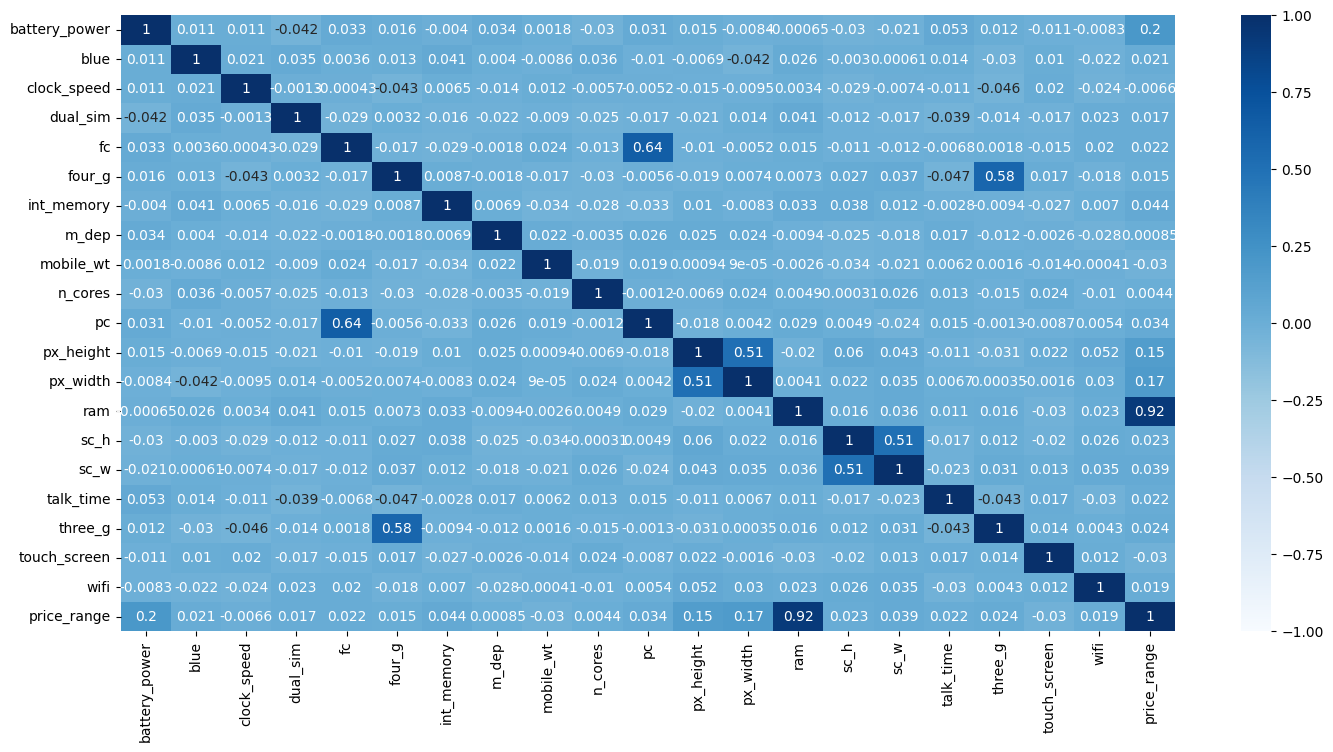

In [5]:
correlation  = df.corr()
ax = plt.subplots(figsize=(17,8))
ax = sns.heatmap(correlation , vmin=-1, vmax=1 , annot=True ,cmap = "Blues")

### So battery power, ram, px_height, px_width are the only features that have strong correlation with the price range

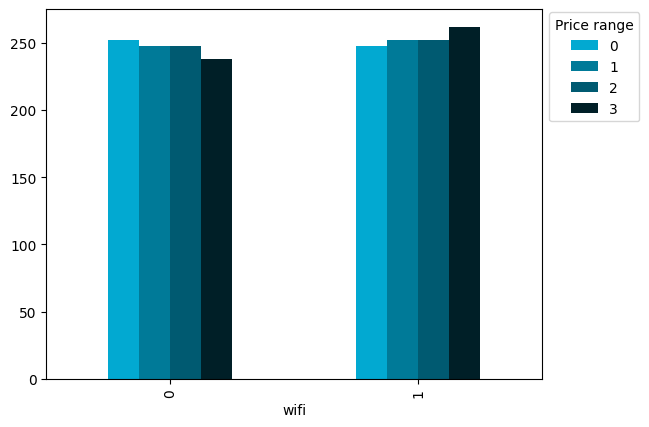

In [6]:
ax = pd.crosstab(df.wifi , df.price_range).plot(kind = "bar" , color  = ["#02A9D1" , "#007A98" ,"#005A71" , "#001F27" ])
ax.legend(bbox_to_anchor=(1.21, 1.01) , title = "Price range")

In [7]:
prices = df.price_range.value_counts()
fg = px.pie(df , names = "price_range")
fg.show()

#### price ranges are equally distributed

Text(0, 0.5, 'Average ram size')

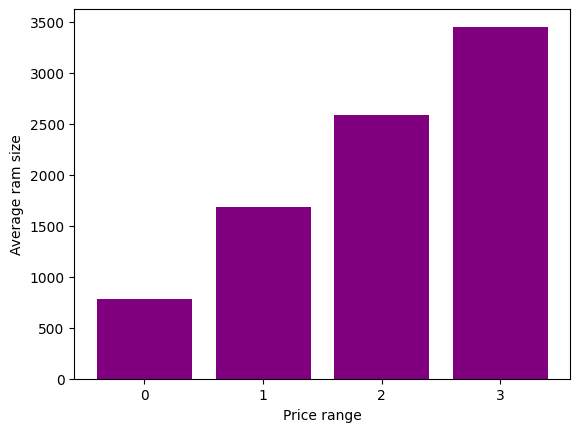

In [8]:
ram = df.groupby("price_range").mean()["ram"]
bars = plt.bar(ram.index  , ram.values  , color = "purple")
plt.xticks(ram.index)
plt.xlabel("Price range")
plt.ylabel("Average ram size")

Text(0, 0.5, 'Price Range')

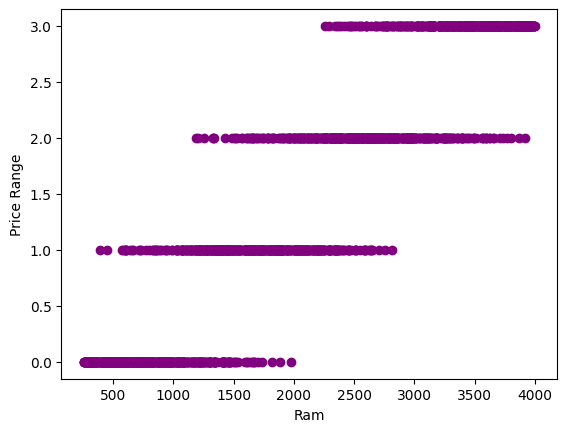

In [9]:
plt.scatter(df.ram, df.price_range , color  = "purple")
plt.xlabel("Ram")
plt.ylabel("Price Range")

Text(0, 0.5, 'Average battery power')

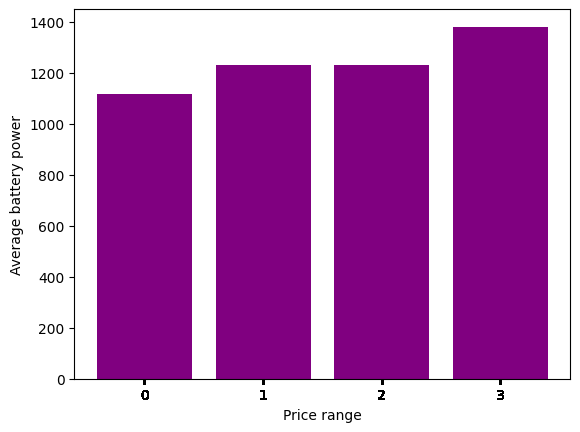

In [10]:
battery = df.groupby("price_range").mean()["battery_power"]
bars = plt.bar(battery.index  , battery.values  , color = "purple")
plt.xlabel("Price range")
plt.xticks(df.price_range)
plt.ylabel("Average battery power")

<Axes: xlabel='battery_power', ylabel='Density'>

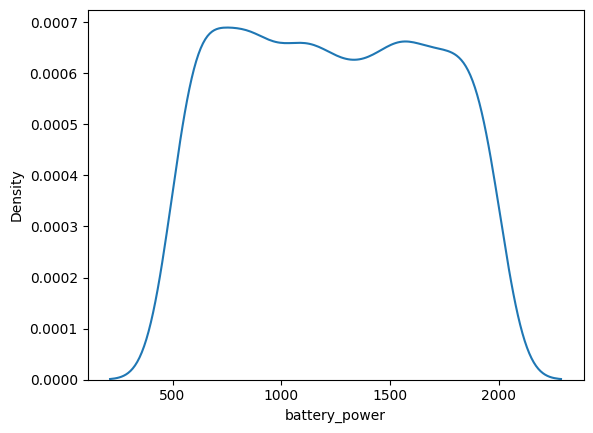

In [11]:
sns.kdeplot(df.battery_power)

<Axes: xlabel='ram', ylabel='Count'>

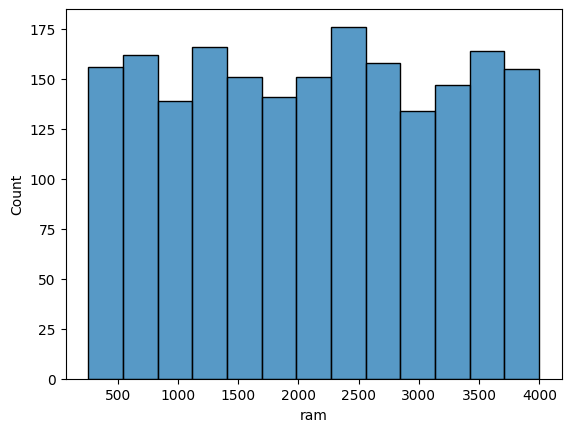

In [12]:
sns.histplot(df.ram)

<Axes: >

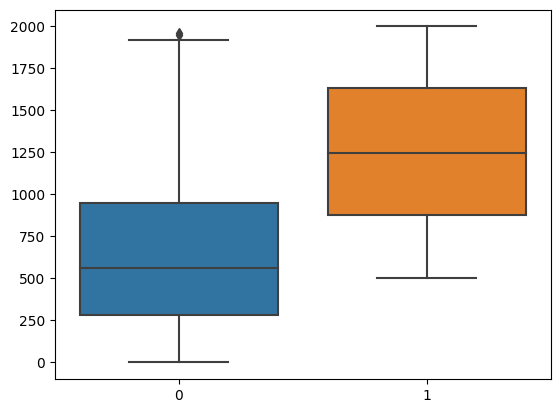

In [13]:
sns.boxplot(data = [df.px_height , df.px_width])

([<matplotlib.patches.Wedge at 0x7def82b15b40>,
 [Text(-0.010367174777798825, 1.0999511451365132, '1'),
  Text(0.010367277762657235, -1.0999511441658636, '0')],
 [Text(-0.005654822606072086, 0.5999733518926434, '50%'),
  Text(0.005654878779631219, -0.5999733513631982, '50%')])

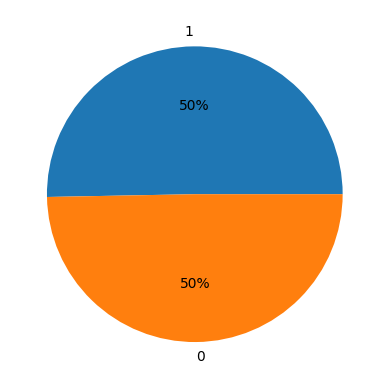

In [14]:
touch_screen  = df.touch_screen.value_counts()
plt.pie(touch_screen.values , labels = touch_screen.index , autopct='%.00f%%')

([<matplotlib.patches.Wedge at 0x7def82b8cbb0>,
 [Text(0.9996796584982272, 0.45895596780613723, '4'),
  Text(0.32839525410870385, 1.0498364430133296, '7'),
  Text(-0.5329547152439493, 0.9622677753615368, '8'),
  Text(-1.058700761496787, 0.29858448989544595, '2'),
  Text(-0.9655974065986648, -0.5268981385143937, '3'),
  Text(-0.32344432920892574, -1.0513723250602462, '5'),
  Text(0.49630802799591345, -0.9816711981854248, '1'),
  Text(1.028988449566648, -0.3888222867306174, '6')],
 [Text(0.5452798137263056, 0.25033961880334754, '14%'),
  Text(0.179124684059293, 0.5726380598254525, '13%'),
  Text(-0.29070257195124505, 0.5248733320153837, '13%'),
  Text(-0.577473142634611, 0.16286426721569777, '12%'),
  Text(-0.5266894945083626, -0.2873989846442147, '12%'),
  Text(-0.17642417956850495, -0.5734758136692252, '12%'),
  Text(0.27071346981595273, -0.5354570171920499, '12%'),
  Text(0.5612664270363533, -0.21208488367124587, '12%')])

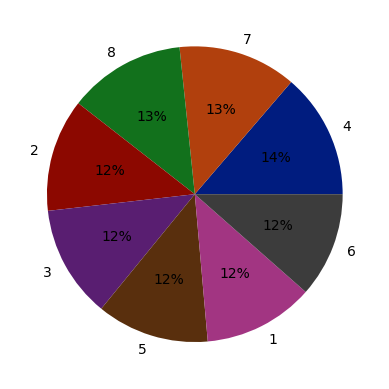

In [15]:
cores  = df.n_cores.value_counts()
palette_color = sns.color_palette('dark') 
plt.pie(cores.values , labels = cores.index , colors = palette_color ,autopct='%.00f%%')

In [16]:
x = df[["ram" , "px_height" , "px_width" ,"battery_power" ]]
y = df.price_range

In [17]:
x_train,x_test , y_train , y_test = train_test_split(x,y, test_size=  0.15 , random_state = 42)

# Testing different machine learning models 

In [18]:
model1 = LinearRegression() 

In [19]:
model1.fit(x_train , y_train)

LinearRegression()

In [20]:
model1.score(x_train,  y_train)

0.9156183853767335

In [21]:
y_pred1 = model1.predict(x_test)
y_pred1 = [ round(value) for value in y_pred1]

In [22]:
print(r2_score(y_pred1 , y_test))

0.9066822806118715


Text(95.72222222222221, 0.5, 'Truth')

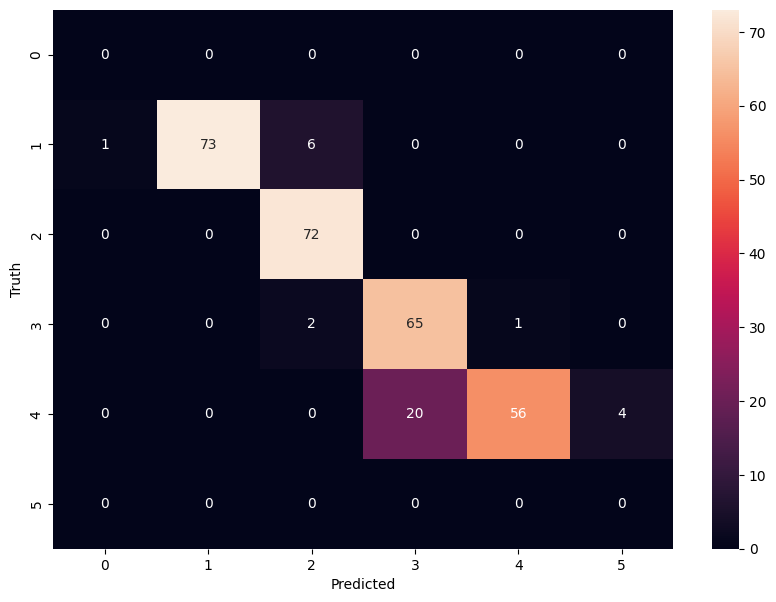

In [23]:
cm = confusion_matrix(y_test, y_pred1) 
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model2 =DecisionTreeRegressor()

In [25]:
model2.fit(x_train  , y_train)

DecisionTreeRegressor()

In [26]:
model2.score(x_train , y_train)

1.0

In [27]:
y_pred2 = model2.predict(x_test)

In [28]:
print(r2_score(y_pred2 , y_test))

0.8727346772551415


Text(95.72222222222221, 0.5, 'Truth')

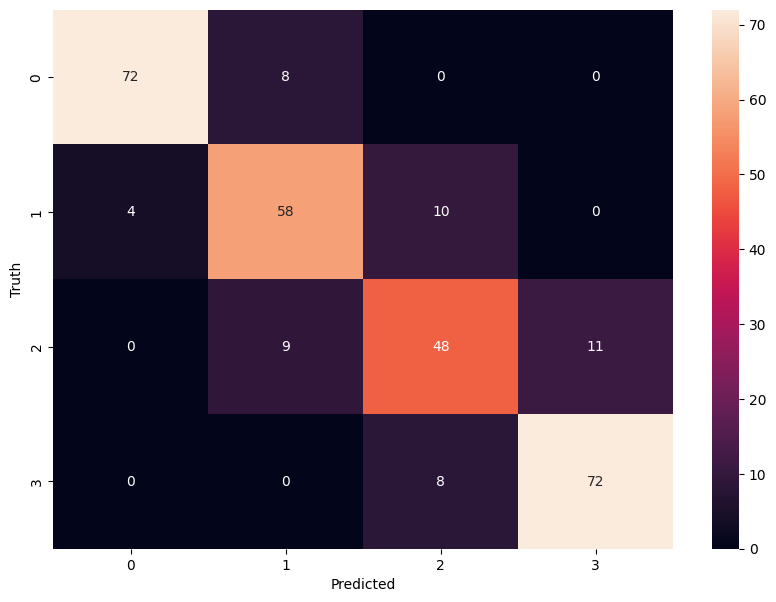

In [29]:
cm = confusion_matrix(y_test, y_pred2) 
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model3 = RandomForestRegressor(n_estimators=300)

In [31]:
model3.fit(x_train , y_train)

RandomForestRegressor(n_estimators=300)

In [32]:
model3.score(x_train , y_train)

0.9926265159068689

In [33]:
y_pred3 = model3.predict(x_test)

In [34]:
print(r2_score(y_pred3 , y_test))

0.9489337931081433


In [35]:
y_pred_rounded = [round(value) for value in y_pred3]

Text(95.72222222222221, 0.5, 'Truth')

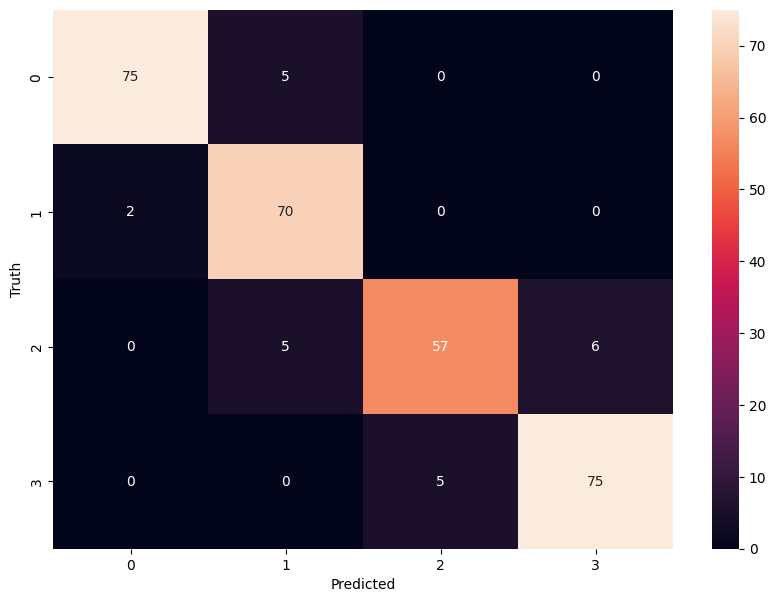

In [36]:
cm = confusion_matrix(y_test, y_pred_rounded) 
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model4 = SVC(C = 15)

In [38]:
model4.fit(x_train , y_train)

SVC(C=15)

In [39]:
model4.score(x_train , y_train)

0.9623529411764706

In [40]:
y_pred4 = model4.predict(x_test)

In [41]:
print(r2_score(y_pred4 , y_test))

0.9721497835278629


Text(95.72222222222221, 0.5, 'Truth')

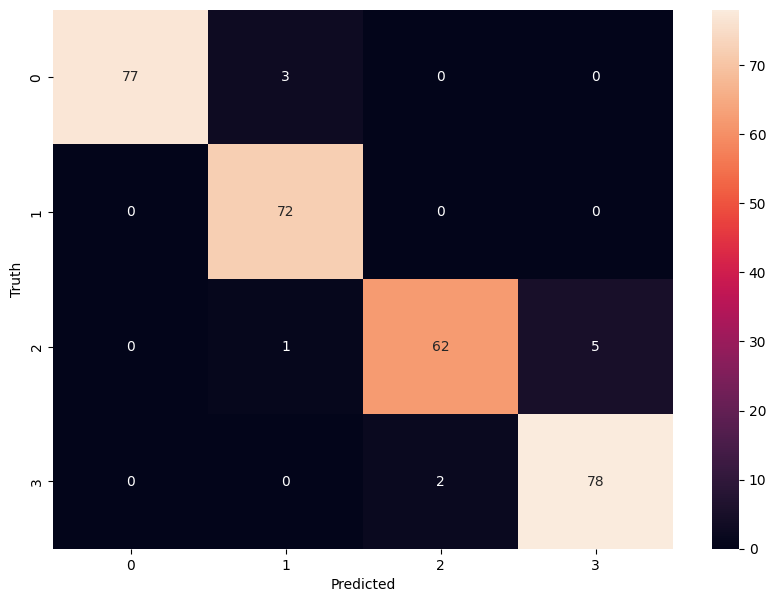

In [42]:
cm = confusion_matrix(y_test, y_pred4) 
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')